<a href="https://colab.research.google.com/github/weslei-silva87/Dashboard-gerencial-automatizado-em-Power-BI/blob/main/Regressao_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Carregando os dados da tabela
import pandas as pd
tabela = pd. read_csv('/content/MKT.csv')
tabela.head(180)


,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
...,...,...,...,...
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60


In [ ]:
#renomeando os nomes das colunas
tabela = tabela.rename(columns={"youtube": "you_tube", "sales":"vendas"})
tabela.head(10)


,you_tube,facebook,newspaper,vendas
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
5,114.84,1.68,8.88,11.40
6,348.84,4.92,10.20,15.36
7,320.28,52.56,6.00,30.48
8,89.64,59.28,54.84,17.64
9,51.72,32.04,42.12,12.12


In [ ]:
# exibir informações sobre a tabela
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
#sem dados nulos e todos configurados em numeros decimal

In [ ]:
#analisando dados atravez do describe
tabela.describe()

,you_tube,facebook,newspaper,vendas
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
#Verificando a Correlação
tabela.corr()


,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


<Axes: >

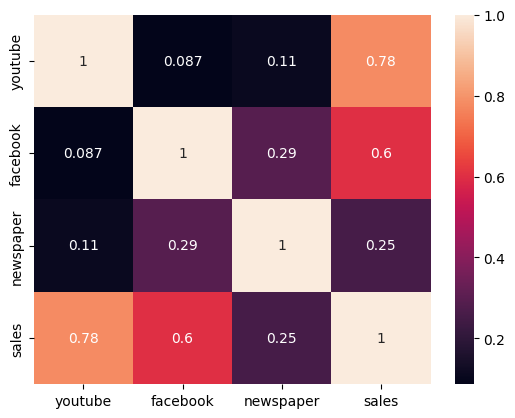

In [ ]:
#Correlação Grafico de Calor
import seaborn as sns
sns.heatmap(tabela.corr(), annot=True)


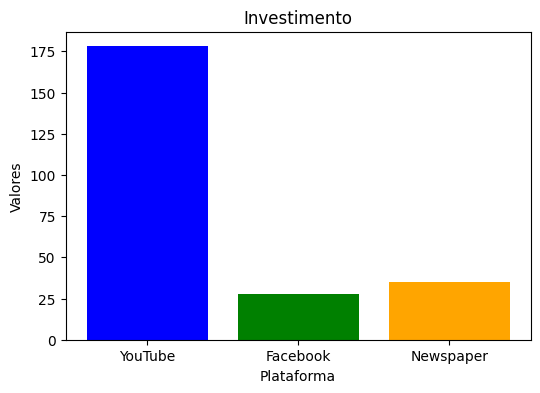

In [ ]:
# indicadores de investimento pela media
import matplotlib.pyplot as plt

plataformas = ['YouTube', 'Facebook', 'Newspaper', ]
valores = [178.021053, 27.671579, 35.24, ]

# Criando o gráfico de colunas
plt.figure(figsize=(6, 4))
plt.bar(plataformas, valores, color=['blue', 'green', 'orange', 'red'])
plt.title('Investimento')
plt.xlabel('Plataforma')
plt.ylabel('Valores')
plt.show()

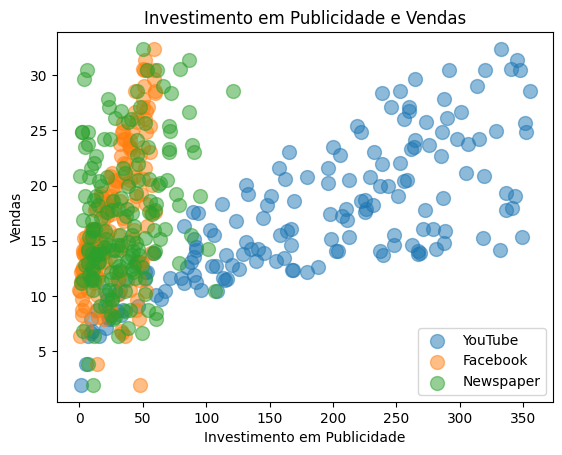

In [ ]:
# Gerando grafico de dispersão para melhorar analise

import pandas as pd
import matplotlib.pyplot as plt

tabela = pd.read_csv("/content/MKT.csv")
# Extrair os dados dos eixos x e y
youtube = tabela['youtube']
facebook = tabela['facebook']
newspaper = tabela['newspaper']
sales = tabela['sales']

# Definir largura de cada ponto
width = 0.5

# Plotar o gráfico de dispersão empilhado
plt.scatter(youtube, sales, label='YouTube', s=100, alpha=0.5)
plt.scatter(facebook, sales, label='Facebook', s=100, alpha=0.5)
plt.scatter(newspaper, sales, label='Newspaper', s=100, alpha=0.5)

# Adicionar rótulos aos eixos e título
plt.xlabel('Investimento em Publicidade')
plt.ylabel('Vendas')
plt.title('Investimento em Publicidade e Vendas')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()


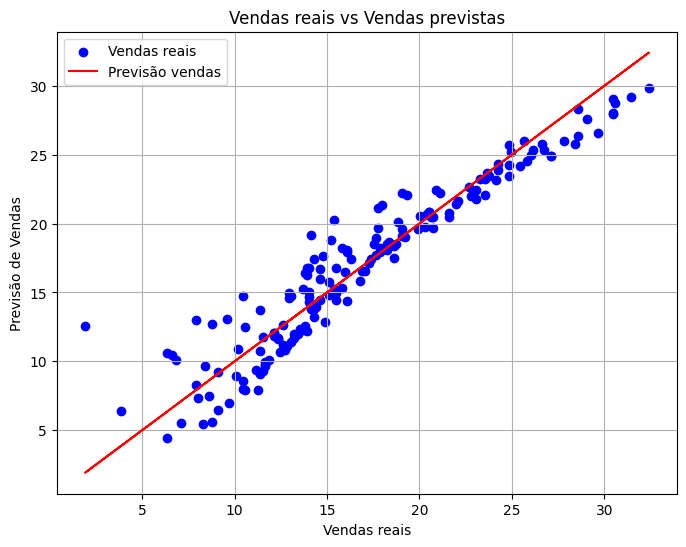

Coeficiente de Determinação (R^2): 0.9004752358539351


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Carregando os dados
tabela = pd.read_csv('/content/MKT.csv')

# Extrair os dados
youtube = tabela['youtube']
facebook = tabela['facebook']
newspaper = tabela['newspaper']
sales = tabela['sales']

# Definindo os investimentos
investimentos = tabela[['youtube', 'facebook', 'newspaper']].values
vendas = tabela['sales'].values

# Criando e treinando o modelo
modelo = LinearRegression()
modelo.fit(investimentos, vendas)

# Fazendo previsões das vendas
previsoes = modelo.predict(investimentos)

# Calculando o coeficiente
r2 = r2_score(vendas, previsoes)

#  gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(vendas, previsoes, color='blue', label='Vendas reais')

# Adicionando linha
plt.plot(vendas, vendas, color='red', label='Previsão vendas')

# Informações do gráfico
plt.title('Vendas reais vs Vendas previstas')
plt.xlabel('Vendas reais')
plt.ylabel('Previsão de Vendas')
plt.legend()
plt.grid(True)

# Exibindo o gráfico
plt.show()

# Imprimindo o coeficiente de determinação (R^2)
print("Coeficiente de Determinação (R^2):", r2)
